In [1]:
from sklearn.datasets import load_wine
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
import sklearn
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap
from matplotlib import pyplot as plt
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.cluster import HDBSCAN
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

assert sklearn.__version__ >= "1.0.1"
wine = load_wine()
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

:Number of Instances: 178
:Number of Attributes: 13 numeric, predictive attributes and the class
:Attribute Information:
    - Alcohol
    - Malic acid
    - Ash
    - Alcalinity of ash
    - Magnesium
    - Total phenols
    - Flavanoids
    - Nonflavanoid phenols
    - Proanthocyanins
    - Color intensity
    - Hue
    - OD280/OD315 of diluted wines
    - Proline
    - class:
        - class_0
        - class_1
        - class_2

:Summary Statistics:

============================= ==== ===== ======= =====
                                Min   Max   Mean     SD
============================= ==== ===== ======= =====
Alcohol:                      11.0  14.8    13.0   0.8
Malic Acid:                   0.74  5.80    2.34  1.12
Ash:                          1.36  3.23    2.36  0.27
Alcalinity of Ash:            10.6  30.0    19.5   3.3
Magnesium:                    70.0 162.0    99.7  14.3

In [2]:
X = pd.DataFrame(wine.data, columns=wine.feature_names)
y=wine.target

In [3]:
X

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.2, shuffle=True, random_state=12345)

len(y_train), len(y_test)

(142, 36)

In [5]:
np.unique(y_train, return_counts=True)

(array([0, 1, 2]), array([47, 57, 38], dtype=int64))

In [6]:
np.unique(y_test, return_counts=True)

(array([0, 1, 2]), array([12, 14, 10], dtype=int64))

In [7]:
ridge = RidgeClassifier(random_state=12345)

ridge.fit(X_train,y_train)

RidgeClassifier(random_state=12345)

In [8]:
ridge.score(X_train,y_train)

1.0

In [9]:
ridge.score(X_test,y_test)

0.9722222222222222

In [10]:
ada = AdaBoostClassifier(random_state=12345)

ada.fit(X_train,y_train)

c:\Users\user\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(random_state=12345)

In [11]:
ada.score(X_train,y_train)

0.9577464788732394

In [12]:
ada.score(X_test,y_test)

1.0

In [13]:
lda = LinearDiscriminantAnalysis(n_components=2)

In [14]:
X_lda = lda.fit_transform(X,y)

In [15]:
hdb = HDBSCAN(min_cluster_size=20)

In [16]:
hdb_pred = hdb.fit_predict(X_lda)

In [17]:
X_lda = pd.DataFrame(X_lda, columns=['1','2'])
X_lda['y'] = y
X_lda['y_pred'] = hdb_pred

In [18]:
X_lda

,1,2,y,y_pred
0,4.700244,1.979138,0,1
1,4.301958,1.170413,0,1
2,3.420720,1.429101,0,1
3,4.205754,4.002871,0,-1
4,1.509982,0.451224,0,-1
...,...,...,...,...
173,-4.291508,3.390332,2,0
174,-4.503296,2.083546,2,0
175,-5.047470,3.196231,2,0
176,-4.276155,2.431388,2,0


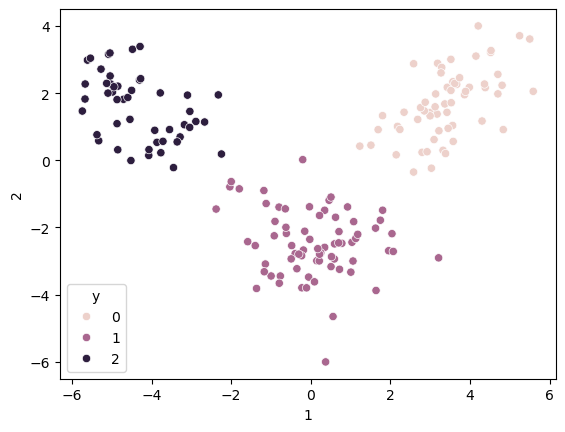

In [19]:
sns.scatterplot(data=X_lda, x='1', y='2', hue='y')
plt.show()

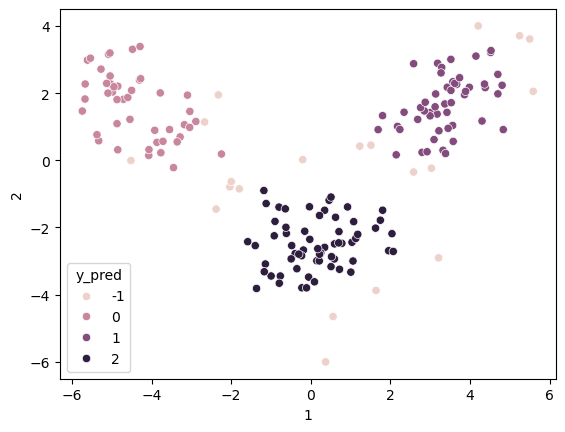

In [20]:
sns.scatterplot(data=X_lda, x='1', y='2', hue='y_pred')
plt.show()